# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [423]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [424]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

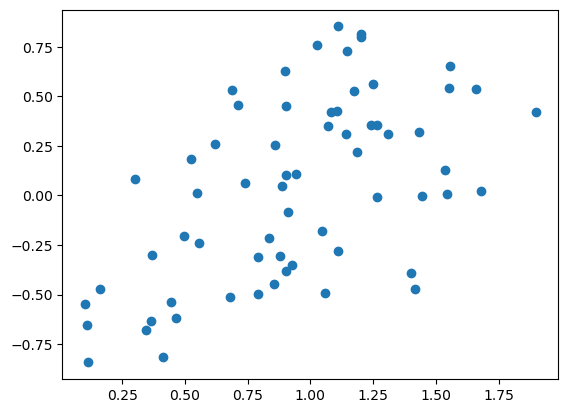

In [425]:
plt.scatter(x.T[0],y)

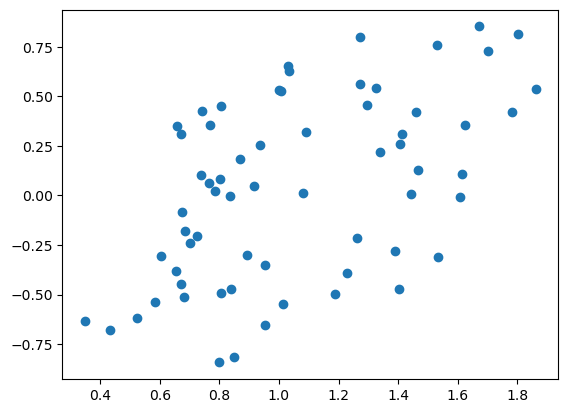

In [426]:
plt.scatter(x.T[1],y)

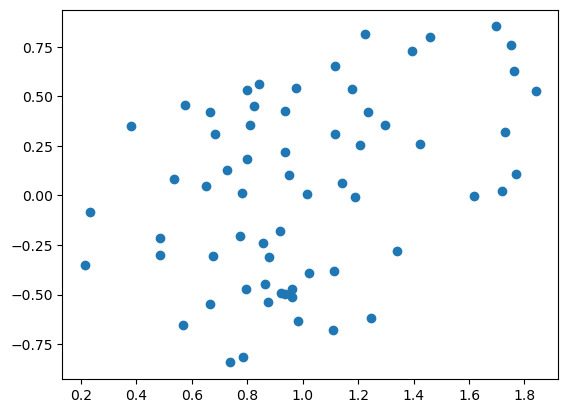

In [427]:
plt.scatter(x.T[2],y)

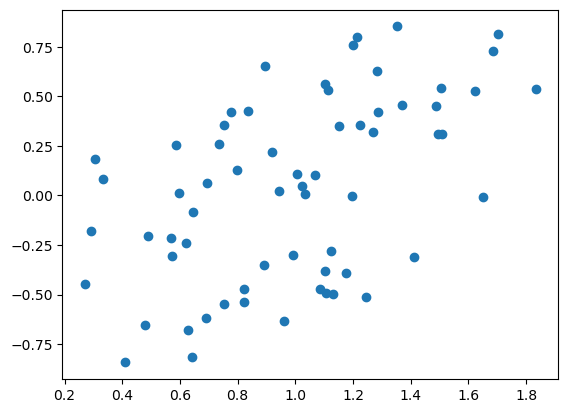

In [428]:
plt.scatter(x.T[3],y)

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [429]:
left = np.linalg.inv(np.dot(x.T, x))

In [430]:
right = np.dot(y.T, x)

In [431]:
np.dot(left, right)

array([ 0.32496433,  0.29226172,  0.16556072,  0.20365826, -0.94980768])

In [432]:
model = np.linalg.lstsq(x, y,rcond=None)[0]
model

array([ 0.32496433,  0.29226172,  0.16556072,  0.20365826, -0.94980768])

In [433]:
yp = np.sum(model[0])*x
yp = np.sum(yp, axis=1)
yp

array([1.23110419, 1.21303301, 1.14788608, 1.12647655, 1.01027996,
       0.99414664, 1.18965231, 1.29563503, 1.19870292, 0.96620929,
       1.4535189 , 1.21512019, 1.1380028 , 1.18831436, 1.14324643,
       1.51433984, 1.28105054, 1.2757265 , 1.58957977, 1.21060356,
       1.30172268, 1.13209457, 1.48412983, 1.38441726, 1.49146497,
       1.34909934, 1.89359497, 1.55078292, 1.63994936, 1.85273884,
       1.50162807, 1.21458235, 1.93844775, 1.60925834, 1.41099362,
       1.68189015, 1.82431848, 1.79519173, 1.49560643, 1.6856416 ,
       2.00223395, 1.62021484, 2.06607457, 1.74972294, 1.96075428,
       1.77158986, 1.98944578, 1.63241476, 1.79874504, 1.81872906,
       1.77710243, 2.1809303 , 1.97960231, 2.15891965, 1.94312836,
       2.05745501, 2.114657  , 2.25051658, 1.9976087 , 2.44891346,
       2.12034733, 2.25217165, 2.34103975, 2.22070948])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

In [434]:
pred1 = np.dot(x, model)
pred1

array([-0.32448114, -0.25890511, -0.35722951, -0.28592803, -0.44425879,
       -0.47434829, -0.2776682 , -0.15273918, -0.3071468 , -0.46058976,
       -0.07881808, -0.28642701, -0.32985973, -0.37096281, -0.39904667,
       -0.06563433, -0.19786831, -0.29877741,  0.00719781, -0.32273239,
       -0.20527482, -0.34901482, -0.11728074, -0.11214706, -0.07725347,
       -0.11339543,  0.27303669, -0.05627054,  0.04002264,  0.27349436,
       -0.04803724, -0.29518158,  0.2684315 ,  0.03438163, -0.15516019,
        0.09278846,  0.18830036,  0.25992732, -0.07472979,  0.04863905,
        0.32236626,  0.09715063,  0.40986488,  0.16994439,  0.35157041,
        0.22345075,  0.30091403,  0.01925617,  0.14326937,  0.22352462,
        0.19225545,  0.46390841,  0.27487862,  0.36083439,  0.19795255,
        0.32566189,  0.36504819,  0.49379075,  0.30116422,  0.70286042,
        0.38007645,  0.51667824,  0.65479626,  0.45639559])

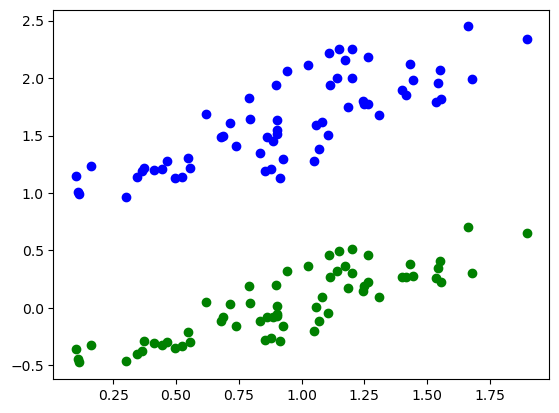

In [435]:
plt.scatter(x.T[0], pred1, c='green')
plt.scatter(x.T[0], yp, c='blue')

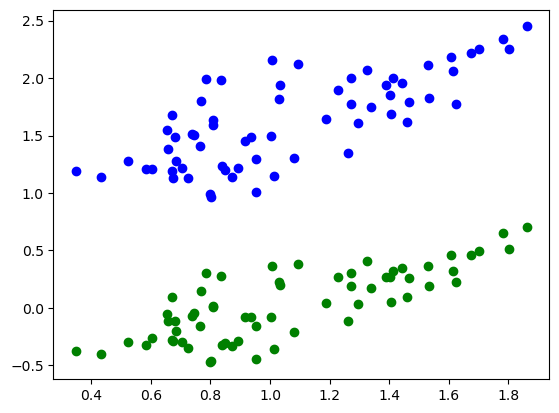

In [436]:
plt.scatter(x.T[1], pred1, c='green')
plt.scatter(x.T[1], yp, c='blue')

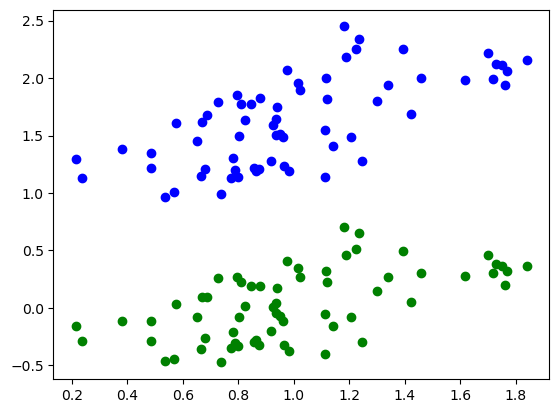

In [437]:
plt.scatter(x.T[2], pred1, c='green')
plt.scatter(x.T[2], yp, c='blue')

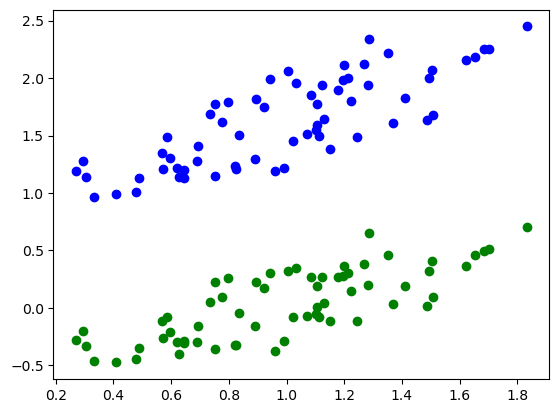

In [438]:
plt.scatter(x.T[3], pred1, c='green')
plt.scatter(x.T[3], yp, c='blue')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [439]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [440]:
columns2 = ['Income', 'Limit']
X2 = credit[columns2].values

X2 = np.vstack([X2.T, np.ones(len(X2))]).T
X2

array([[1.48910e+01, 3.60600e+03, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 1.00000e+00]])

In [441]:
columns3 = ['Cards', 'Balance']
X3 = credit[columns3].values

X3 = np.vstack([X3.T, np.ones(len(X3))]).T
X3

array([[  2., 333.,   1.],
       [  3., 903.,   1.],
       [  4., 580.,   1.],
       ...,
       [  5., 138.,   1.],
       [  1.,   0.,   1.],
       [  5., 966.,   1.]])

In [442]:
columns4 = ['Education', 'Age']
X4 = credit[columns4].values

X4 = np.vstack([X4.T, np.ones(len(X4))]).T
X4

array([[11., 34.,  1.],
       [15., 82.,  1.],
       [11., 71.,  1.],
       ...,
       [12., 67.,  1.],
       [13., 44.,  1.],
       [ 7., 64.,  1.]])

In [443]:
columns5 = ['Cards', 'Balance', 'Limit']
X5 = credit[columns5].values

X5 = np.vstack([X5.T, np.ones(len(X5))]).T
X5

array([[2.000e+00, 3.330e+02, 3.606e+03, 1.000e+00],
       [3.000e+00, 9.030e+02, 6.645e+03, 1.000e+00],
       [4.000e+00, 5.800e+02, 7.075e+03, 1.000e+00],
       ...,
       [5.000e+00, 1.380e+02, 4.171e+03, 1.000e+00],
       [1.000e+00, 0.000e+00, 2.525e+03, 1.000e+00],
       [5.000e+00, 9.660e+02, 5.524e+03, 1.000e+00]])

In [444]:
y2 = credit['Rating']
y2

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [445]:
model2 = np.linalg.lstsq(X2, y2,rcond=None)[0]
model2

array([2.07464217e-02, 6.65723378e-02, 3.87419069e+01])

In [446]:
model3 = np.linalg.lstsq(X3, y2,rcond=None)[0]
model3

array([ -2.43584834,   0.29126669, 210.68097469])

In [447]:
model4 = np.linalg.lstsq(X4, y2,rcond=None)[0]
model4

array([ -1.5104736 ,   0.92634084, 323.68879114])

In [448]:
model5 = np.linalg.lstsq(X5, y2,rcond=None)[0]
model5

array([4.81235623e+00, 1.70598337e-03, 6.65011947e-02, 2.48972621e+01])

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

Rating ~ Income + Limit

In [449]:
pred_inc_lim = np.dot(X2, model2)

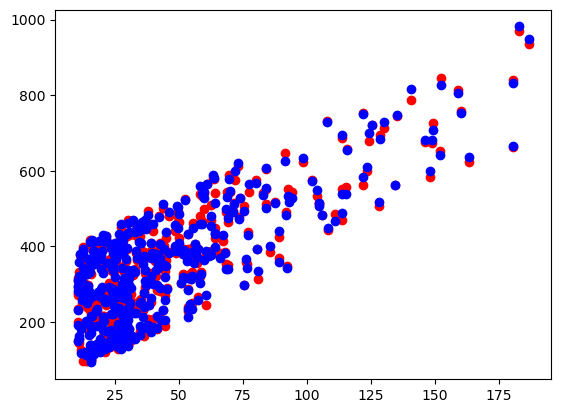

In [450]:
plt.scatter(X2.T[0], pred_inc_lim, c='red')
plt.scatter(X2.T[0], y2, c='b')

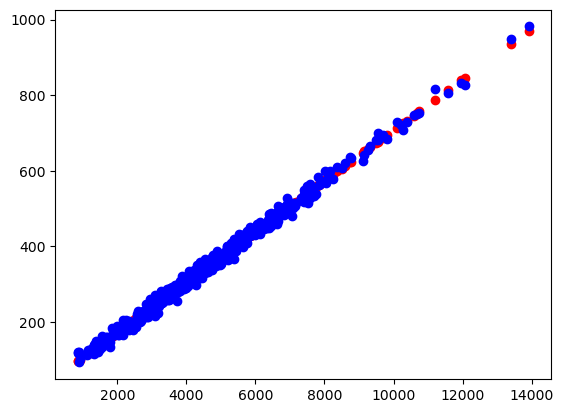

In [451]:
plt.scatter(X2.T[1], pred_inc_lim, c='red')
plt.scatter(X2.T[1], y2, c='b')

In [452]:
from mpl_toolkits.mplot3d import Axes3D

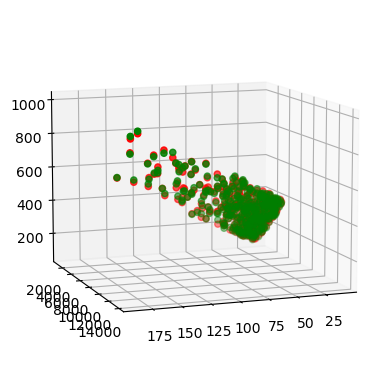

In [453]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 70)
ax.scatter(X2.T[0], X2.T[1], pred_inc_lim, zdir='z', c='r')
ax.scatter(X2.T[0], X2.T[1], y2, zdir='z', c='g')

Rating ~ Cards + Balance

In [468]:
pred_card_bal = np.dot(X3, model3)

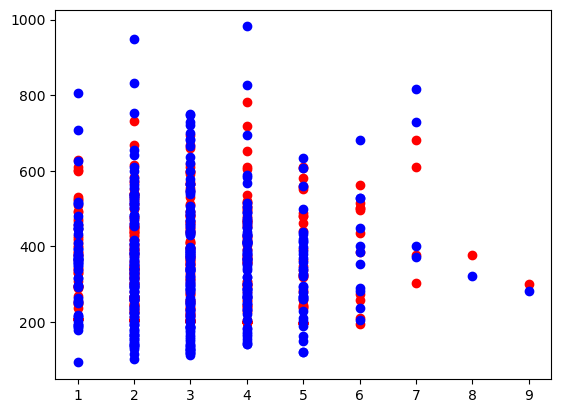

In [455]:
plt.scatter(X3.T[0], pred_card_bal, c='red')
plt.scatter(X3.T[0], y2, c='b')

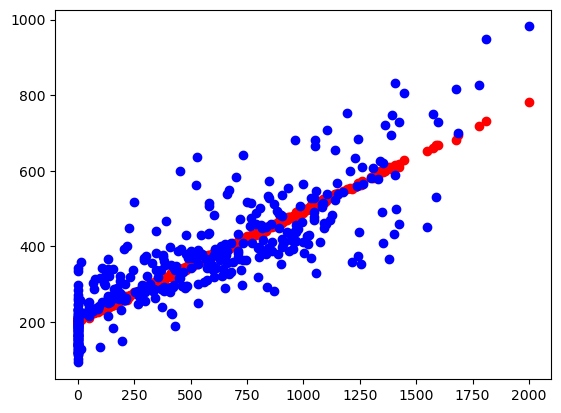

In [456]:
plt.scatter(X3.T[1], pred_card_bal, c='red')
plt.scatter(X3.T[1], y2, c='b')

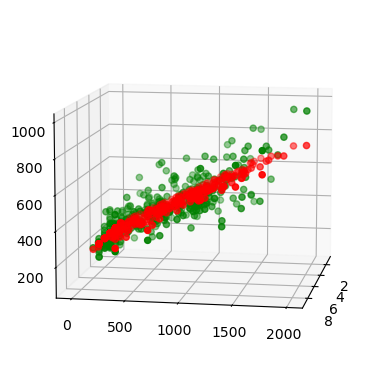

In [457]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.view_init(10, 10)
ax.scatter(X3.T[0], X3.T[1], pred_card_bal, zdir='z', c='r')
ax.scatter(X3.T[0], X3.T[1], y2, zdir='z', c='g')

Rating ~ Education + Age

In [458]:
pred_edc_age = np.dot(X4, model4)

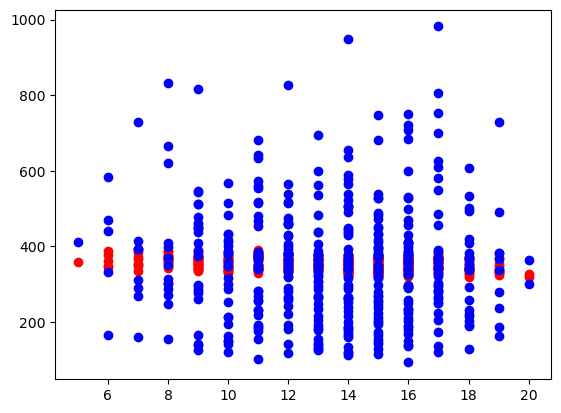

In [459]:
plt.scatter(X4.T[0], pred_edc_age, c='red')
plt.scatter(X4.T[0], y2, c='b')

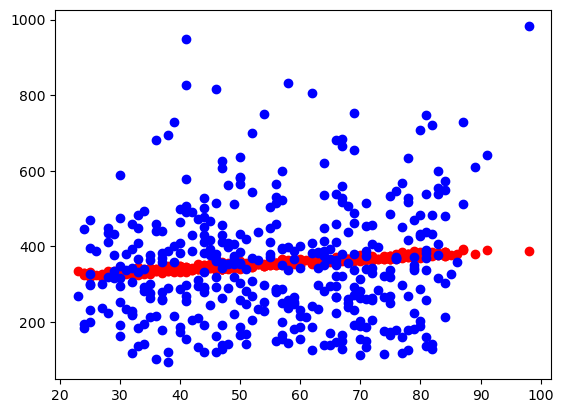

In [460]:
plt.scatter(X4.T[1], pred_edc_age, c='red')
plt.scatter(X4.T[1], y2, c='b')

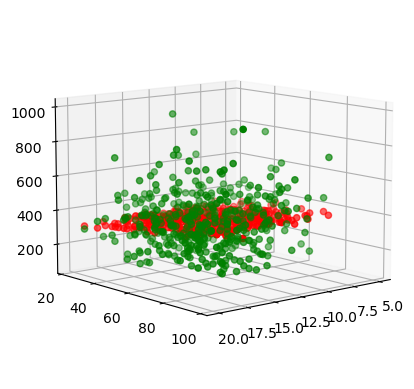

In [461]:
fig3 = plt.figure()
ax = fig3.add_subplot(111, projection='3d')
ax.view_init(10, 50)
ax.scatter(X4.T[0], X4.T[1], pred_edc_age, zdir='z', c='r')
ax.scatter(X4.T[0], X4.T[1], y2, zdir='z', c='g')

Rating ~ Cards + Balance + Limit

In [462]:
pred_card_bal_lim = np.dot(X5, model5)

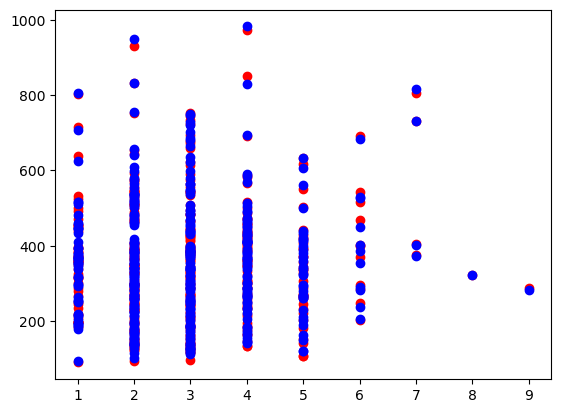

In [463]:
plt.scatter(X5.T[0], pred_card_bal_lim, c='red')
plt.scatter(X5.T[0], y2, c='b')

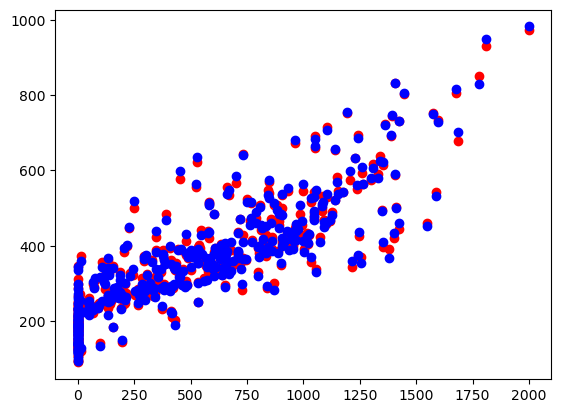

In [464]:
plt.scatter(X5.T[1], pred_card_bal_lim, c='red')
plt.scatter(X5.T[1], y2, c='b')

In [465]:
H = X5.T[2] #limit in color as 4th dimension

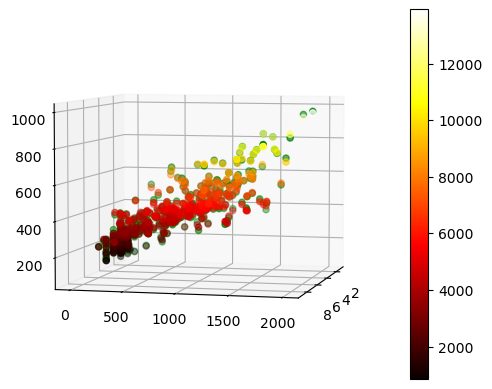

In [466]:
fig4 = plt.figure()
ax = fig4.add_subplot(111, projection='3d')
ax.view_init(5, 14)
grp = ax.scatter(X5.T[0], X5.T[1], pred_card_bal_lim, zdir='z', c=H,  cmap=plt.hot())
grp
ax.scatter(X5.T[0], X5.T[1], y2, zdir='z', c='green')
fig.colorbar(grp)